### 합성곱신경망(convolutional neural network, CNN)

### CNN 구조

<img src='./img/CNN_1.png' width=500>

CNN에서는 '합성곱 계층 Conv'과 '풀링 계층 Pooling'이 추가됨  
CNN의 계층은 'Conv - ReLU - (Pooling)' 흐름으로 연결(풀링 계층은 생략하기도 함)  
  
출력에 가까운 층에서는 'Affine - ReLU' 구성을 사용할 수 있음  
마지막 출력 계층에서는 'Affine - Softmax' 조합을 그대로 사용함  
(Affine : 완전연결층)

### 완전연결 계층의 문제점

완전연결 계층은 데이터의 형상이 무시됨  
  
ex) 
세로, 가로, 채널(색상)으로 구성된 3차원 이미지 데이터의 경우,  
3차원인 형상에는 공간적 정보가 담겨 있으나,  
완전연결 계층에 입력할 때는 3차원 데이터를 평평한 1차원 데이터로 평탄화해줘야 함  
형상을 무시하고 모든 입력 데이터를 동등한 뉴런(같은 차원의 뉴런)으로 취급하여 형상에 담긴 정보를 살릴 수 없음  
  
한편, 합성곱 계층은 형상을 유지함  
이미지도 3차원 데이터로 입력받으며, 마찬가지로 다음 계층에도 3차원 데이터로 전달함  
CNN에서는 합성곱 계층의 입출력 데이터를 특징 맵(feature map)이라고 부름  
- 합성곱 계층의 입력 데이터 : 입력 특징 맵(input feature map)
- 합성곱 계층의 출력 데이터 : 출력 특징 맵(output feature map)

### 합성곱 연산

합성곱 계층에서는 합성곱 연산을 처리  
합성곱 연산은 이미지 처리에서 말하는 필터 연산에 해당

<img src='./img/CNN_2.jpeg' width=500>

데이터와 필터의 형상을 (높이 height, 너비 width)로 표기하며,  
위 예에서는 입력은 (4,4), 필터는 (3,3), 출력은 (2,2)가 됨  
  
필터를 커널이라 칭하기도 함

<img src='./img/CNN_3.png' width=500>

합성곱 연산은 필터의 윈도우를 일정 간격으로 이동해가며 입력 데이터에 적용함  
(윈도우 : 회색 $3\times3$ 부분)  
입력과 필터에서 대응하는 원소끼리 곱한 후 그 총합을 구함  
이 계산을 __단일 곱셈-누산__(fused multiply-add, FMA)이라고 함  

ex)
첫 번째 그림의 경우,  
$1\times2+2\times0+3\times1+0\times0+1\times1+2\times2+3\times1+0\times0+1\times2=15$  
  
CNN에서는 필터의 매개변수가 '가중치'에 해당

<img src='./img/CNN_4.png' width=500>

편향은 필터를 적용한 모든 원소(데이터)에 더함  
편향은 항상 하나($1\times1$)만 존재함 

### 패딩

패딩(padding) : 합성곱 연산을 수행하기 전에 입력 데이터 주변을 특정 값(0)으로 채움

<img src='./img/padding_1.png' width=500>

패딩은 주로 출력 크기를 조정할 목적으로 사용  
  
예를 들어 (4,4) 입력 데이터에 (3,3) 필터를 적용하면 출력은 (2,2)가 되어, 입력보다 2만큼 줄어듬  
합성곱 연산을 몇 번이나 되풀이하는 심층 신경망에서는 합성곱 연산을 거칠 때마다 작아지면 어느 시점에서는 출력 크기가 1이 되어 더 이상은 합성곱 연산을 적용할 수 없게 될 수 있음  
이러한 사태를 막기 위해 패딩을 사용함  
  
위 예시에서 볼 수 있듯이, 패딩의 폭을 1로 설정하니 (4,4) 입력에 대한 출력이 같은 크기인 (4,4)로 유지됨  
즉, 입력 데이터의 공간적 크기를 고정한 채로 다음 계층에 전달할 수 있음

### 스트라이드

스트라이드(stride) : 필터를 적용하는 위치의 간격  
(우리말로 '보폭'이라는 뜻)

<img src='./img/stride_1.png' width=500>

- 패딩을 크게 하면 출력 크기가 커지고,  
- 스트라이드를 크게 하면 출력 크기는 작아짐  
  
입력 크기를 (H,W), 필터 크기를 (FH, FW), 출력 크기를(OH, OW), 패딩을 P, 스트라이드를 S라고 하면, 출력 크기는 다음 식으로 계산 됨  
  
$OH=\frac{H+2P-FH}{S}+1$  

$OW=\frac{W+2P-FW}{S}+1$  

### 3차원 데이터의 합성곱 연산

<img src='./img/CNN_5.png' width=500>

2차원일 때와 비교하면, 길이 방향(채널 방향)으로 특징 맵이 늘어남  
채널 쪽으로 특징 맵이 여러 개 있다면 입력 데이터와 필터의 합성곱 연산을 채널마다 수행하고, 그 결과를 더해서 하나의 출력을 얻음

<img src='./img/CNN_6.png' width=500>

입력 데이터의 채널 수와 필터의 채널 수가 같아야 함  
(필터의 크기는 원하는 값으로 설정할 수 있음. 단, 모든 채널의 필터가 같은 크기여야 함)

### 블록으로 생각하기

<img src='./img/CNN_7.png' width=500>

3차원의 합성곱 연산은 데이터와 필터를 직육면체 블록이라고 생각하면 쉬움  
  
위 예에서 출력 데이터는 한 장의 특징 맵(채널이 1개인 특징 맵)임  
합성곱 연산의 출력으로 다수의 채널을 내보내려면  
필터(가중치)를 다수 사용하면 됨!

<img src='./img/CNN_8.png' width=500>

필터를 FN개 적용하면 출력 맵도 FN개가 생성됨  
  
따라서 합성곱 연산에서는 필터의 수도 고려해야 함  
필터의 가중치 데이터는 4차원 데이터(출력 채널 수, 입력 채널 수, 높이, 너비) 순으로 씀

<img src='./img/CNN_9.png' width=500>

편향은 채널 하나에 값 하나씩으로 구성됨  

### 배치 처리

<img src='./img/CNN_10.png' width=500>

각 데이터의 선두에 배치용 차원을 추가하여 데이터를 (데이터 수, 채널 수, 높이, 너비) 순으로 저장  
데이터는 위와 같이 4차원 형상을 가진 채 각 계층을 타고 흐르며  
데이터 N개에 대한 합성곱 연산이 이뤄짐(N회 분의 처리를 한 번에 수행)

### 풀링 계층

ex) $2\times2$ 최대 풀링(max pooling)을 스트라이드 2로 처리

<img src='./img/pooling_1.png' width=500>

최대풀링 : 대상 영역에서 최댓값을 구하는 연산  
위 예에서 $2\times2$가 대상 영역의 크기  
  
풀링의 윈도우 크기와 스트라이드는 보통 같은 값으로 설정함  
풀링은 최대 풀링 외에도 평균 풀링 등이 있으나, 주로 최대 풀링을 사용함

__풀링 계층의 특징__  
  
1. 채널 수가 변하지 않는다.
    풀링 연산은 입력 데이터의 채널 수 그대로 출력 데이터로 내보냄  
    채널마다 독립적으로 계산하기 때문

<img src='./img/pooling_2.png' width=500>

2. 입력의 변화에 영향을 적게 받는다(데이터에 따라서는 다를 수 있음)  
    입력 데이터가 조금 변해도 풀링의 결과는 잘 변하지 않음

### 합성곱/풀링 계층 구현

### 4차원 배열

In [1]:
import numpy as np
x = np.random.rand(10, 1, 28, 28) # 무작위로 데이터 생성
x.shape # 데이터 10개, 채널 1, 높이 28, 너비 28

(10, 1, 28, 28)

In [2]:
print(x[0].shape) # 첫 번째 데이터
print(x[1].shape) # 두 번째 데이터

(1, 28, 28)
(1, 28, 28)


In [3]:
x[0,0] # 첫 번째 데이터의 첫 채널의 공간 데이터

array([[0.50316336, 0.7511575 , 0.0762883 , 0.5337324 , 0.86334461,
        0.40644037, 0.63605815, 0.21683557, 0.52094898, 0.11201257,
        0.37232237, 0.70273387, 0.99618482, 0.3566773 , 0.84262949,
        0.43956506, 0.00844174, 0.55959293, 0.81068651, 0.19599028,
        0.03746121, 0.29713737, 0.13331609, 0.96201067, 0.38933646,
        0.18933786, 0.66990639, 0.97147994],
       [0.17746137, 0.91207148, 0.93090653, 0.24115851, 0.65776434,
        0.99810318, 0.89525894, 0.62942244, 0.82392598, 0.22199086,
        0.78422602, 0.34295856, 0.32830894, 0.60209598, 0.58096791,
        0.67739412, 0.08809075, 0.38062333, 0.54030226, 0.89015827,
        0.27260749, 0.46053969, 0.2997987 , 0.28329796, 0.73235303,
        0.40214777, 0.34024179, 0.80557524],
       [0.60914625, 0.15741805, 0.4337216 , 0.94568455, 0.61126927,
        0.38974931, 0.08801086, 0.74337946, 0.58449393, 0.83665917,
        0.80423125, 0.6857222 , 0.39452282, 0.54957053, 0.112052  ,
        0.79519623, 0.4758

### im2col로 데이터 전개하기

( ※ 넘파이에서는 원소에 접근할 때 for 문을 사용하지 않는 것이 바람직 함, 성능이 떨어짐   
따라서 for 문 대신 im2col 함수 사용)

im2col(image to column)은 입력 데이터를 2차원 데이터로 변환해 줌  
변환된 2차원 데이터의 열의 갯수는 필터를 일렬로 나열한 것의 갯수와 같음

<img src='./img/im2col.png' width=500>

im2col함수는 입력 데이터에서 필터 적용 영역을 앞에서부터 순서대로 1줄로 펼침  
im2col로 입력 데이터를 전개한 다음에는 합성곱 계층의 필터(가중치)를 1열로 전개하고,  
두 행렬의 곱을 계산함  
  
- im2col 방식으로 출력한 결과는 2차원 행렬  
    (행의 갯수 : $N\times OH\times OW$개/열의 갯수 : $C\times FH\times FW$개)  
  
- 필터도 2차원 데이터로 변환  
    (행의 갯수 : $C\times FH\times FW$개/열의 갯수 : $FN$개)

CNN은 데이터를 4차원 배열로 저장하므로 2차원인 출력 데이터를 4차원으로 변형해줘야 함

<참고>  
위 예시에서는 스트라이드를 크게 잡아 필터의 적용 영역이 겹치지 않도록 했지만, 실제 상황에서는 영역이 겹치는 경우가 대부분임  
필터 적용 영역이 겹치면 im2col로 전개한 후의 원소 수가 원래 블록의 원소 수보다 많아짐  
따라서 im2col을 사용해 구현하면 메모리를 더 많이 소비하는 단점이 있음  
하지만 문제를 행렬계산으로 만들면 선형 대수 라이브러리를 활용해 효율을 높일 수 있음

##### 순전파

In [5]:
def im2col(input_data, filter_h, filter_w, stride=1, pad=0):
    N, C, H, W = input_data.shape
    out_h = (H + 2*pad - filter_h)//stride + 1
    out_w = (W + 2*pad - filter_w)//stride + 1

    img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
    col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

    for y in range(filter_h):
        y_max = y + stride*out_h
        for x in range(filter_w):
            x_max = x + stride*out_w
            col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride] # 필터에 대응하는 이미지

    col = col.transpose(0, 4, 5, 1, 2, 3).reshape(N*out_h*out_w, -1) # (N * OH * OW, C * FH * FW) 2차원 배열로 변경
    return col

##### 역전파

역전파 시 순전파 때의 입력데이터에 맞도록 col2im 함수를 사용하여 데이터의 크기를 되돌림

In [ ]:
def col2im(col, input_shape, filter_h, filter_w, stride=1, pad=0):
    """(im2col과 반대) 2차원 배열을 입력받아 다수의 이미지 묶음으로 변환"""
    N, C, H, W = input_shape
    out_h = (H + 2*pad - filter_h)//stride + 1
    out_w = (W + 2*pad - filter_w)//stride + 1
    col = col.reshape(N, out_h, out_w, C, filter_h, filter_w).transpose(0, 3, 4, 5, 1, 2) # 2차원 데이터를 다시 6차원 데이터로 변경

    img = np.zeros((N, C, H + 2*pad + stride - 1, W + 2*pad + stride - 1))
    for y in range(filter_h):
        y_max = y + stride*out_h
        for x in range(filter_w):
            x_max = x + stride*out_w
            img[:, :, y:y_max:stride, x:x_max:stride] += col[:, :, y, x, :, :]

    return img[:, :, pad:H + pad, pad:W + pad] # 패딩 부분을 제외한 원래 이미지(N, C, H, W)를 반환

### 합성곱 계층 구현

In [6]:
x1 = np.random.rand(1,3,7,7) # (데이터 수, 채널 수, 높이, 너비)
col1 = im2col(x1, 5, 5, stride=1, pad=0)
print(col1.shape)

x2 = np.random.rand(10,3,7,7) # 데이터 10개
col2 = im2col(x2, 5, 5, stride=1, pad=0)
print(col2.shape)

(9, 75)
(90, 75)


두 경우 모두 2번째 차원의 원소는 75개  
이 값은 필터의 원소 수와 같음(채널 3개, $5\times5$ 데이터)

In [10]:
class Convolution:
    def __init__(self, W, b, stride=1, pad=0):
        self.W = W
        self.b = b
        self.stride = stride
        self.pad = pad
        
    def forward(self, x):
        FN, C, FH, FW = self.W.shape
        N, C, H, W = x.shape
        out_h = int(1 + (H + 2*self.pad - FH) / self.stride)
        out_w = int(1 + (W + 2*self.pad - FW) / self.stride)
        
        col = im2col(x, FH, FW, self.stride, self.pad) # (N * OH * OW, C * FH * FW)
        col_W = self.W.reshape(FN, -1).T # 필터 전개 # (C * FH * FW, FN)
        out = np.dot(col, col_W) + self.b # (N * OH * OW, FN)
        
        out = out.reshape(N, out_h, out_w, -1).transpose(0,3,1,2) # (N, FN, OH, OW)
        return out
    
    def backward(self, dout):
        FN, C, FH, FW = self.W.shape
        dout = dout.transpose(0,2,3,1).reshape(-1, FN) # (N, FN, OH, OW) -> (N * OH * OW, FN)

        self.db = np.sum(dout, axis=0)
        self.dW = np.dot(self.col.T, dout) # (C * FH * FW, FN)
        self.dW = self.dW.transpose(1, 0).reshape(FN, C, FH, FW) # (FN, C, FH, FW) 

        dcol = np.dot(dout, self.col_W.T) # (N * OH * OW, C * FH * FW)
        dx = col2im(dcol, self.x.shape, FH, FW, self.stride, self.pad)
        return dx

### 풀링 계층 구현

<img src='./img/pooling_3.png' width=500>

풀링 계층 구현도 합성곱 계층과 마찬가지로 im2col을 사용해 입력 데이터를 전개  
단, 풀링 적용 영역을 채널마다 독립적으로 전개함

<img src='./img/pooling_4.png' width=500>

전개한 행렬에서 행별 최댓값을 구하고 적절한 형상으로 변형

In [12]:
class Pooling:
    def __init__(self, pool_h, pool_w, stride=1, pad=0):
        self.pool_h = pool_h
        self.pool_w = pool_w
        self.stride = stride
        self.pad = pad
        
    def forward(self, x):
        N, C, H, W = x.shape
        out_h = int(1 + (H - self.pool_h) / self.stride)
        out_w = int(1 + (W - self.pool_w) / self.stride)
        
        # 입력 데이터 전개
        col = im2col(x, self.pool_h, self.pool_w, self.stride, self.pad) # (N * OH * OW, C * PH * PW)
        col = col.reshape(-1, self.pool_h * self.pool_w) # (N * OH * OW * C, PH * PW)
        
        # 행별 최댓값
        out = np.max(col, axis=1)
        
        # 적절한 형상으로 변형
        out = out.reshape(N, out_h, out_w, C).transpose(0,3,1,2) # (N, C, OH, OW) 
        
        return out
    
    def backward(self, dout):
        dout = dout.transpose(0, 2, 3, 1) # (N, OH, OW, C)
        
        pool_size = self.pool_h * self.pool_w
        dmax = np.zeros((dout.size, pool_size)) # 크기 (N * OH * OW * C, PH * PW)인 zeros 배열
        dmax[np.arange(self.arg_max.size), self.arg_max.flatten()] = dout.flatten() # 최대값 인덱스에 역전파된 미분값을 대입하고 나머지는 0
        dmax = dmax.reshape(dout.shape + (pool_size,)) # (N, OH, OW, C, PH * PW) 
        
        dcol = dmax.reshape(dmax.shape[0] * dmax.shape[1] * dmax.shape[2], -1) # (N * OH * OW, C * PH * PW)
        dx = col2im(dcol, self.x.shape, self.pool_h, self.pool_w, self.stride, self.pad) # 순전파 대 입력되었던 원래 데이터 크기인 self.x.shape으로 변환
        
        return dx

### CNN 구현

MNIST 데이터셋

<img src='./img/CNN_11.png' width=500>

In [25]:
import pickle
import numpy as np
from collections import OrderedDict
from common.layers import *
from common.gradient import numerical_gradient


class SimpleConvNet:
    def __init__(self, input_dim=(1, 28, 28), 
                 conv_param={'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1},
                 hidden_size=100, output_size=10, weight_init_std=0.01):
        filter_num = conv_param['filter_num']
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        input_size = input_dim[1]
        conv_output_size = (input_size - filter_size + 2*filter_pad) / filter_stride + 1 # 합성곱 계층의 출력 데이터 크기
        pool_output_size = int(filter_num * (conv_output_size/2) * (conv_output_size/2)) # 풀링 계층의 출력 데이터 크기 

        # 가중치 매개변수 초기화
        self.params = {}
        # 합성곱 계층 매개변수
        self.params['W1'] = weight_init_std * \
                            np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num)
        # 첫번째 Affine 계층 매개변수
        self.params['W2'] = weight_init_std * \
                            np.random.randn(pool_output_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        # 두번째 Affine 계층 매개변수
        self.params['W3'] = weight_init_std * \
                            np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)

        # CNN 구성하는 계층들 생성
        self.layers = OrderedDict()
        self.layers['Conv1'] = Convolution(self.params['W1'], self.params['b1'],
                                           conv_param['stride'], conv_param['pad'])
        self.layers['Relu1'] = Relu()
        self.layers['Pool1'] = Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Affine1'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W3'], self.params['b3'])

        self.last_layer = SoftmaxWithLoss()

    # 추론 수행
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    # 손실함수
    def loss(self, x, t):
        y = self.predict(x)
        return self.last_layer.forward(y, t)

    # 정확도
    def accuracy(self, x, t, batch_size=100):
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        acc = 0.0
        
        for i in range(int(x.shape[0] / batch_size)):
            tx = x[i*batch_size:(i+1)*batch_size]
            tt = t[i*batch_size:(i+1)*batch_size]
            y = self.predict(tx)
            y = np.argmax(y, axis=1)
            acc += np.sum(y == tt) 
        
        return acc / x.shape[0]

    # 매개변수의 기울기 - 오차역전파법
    def gradient(self, x, t):
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Conv1'].dW, self.layers['Conv1'].db
        grads['W2'], grads['b2'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W3'], grads['b3'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads
        
    def save_params(self, file_name="params.pkl"):
        params = {}
        for key, val in self.params.items():
            params[key] = val
        with open(file_name, 'wb') as f:
            pickle.dump(params, f)

    def load_params(self, file_name="params.pkl"):
        with open(file_name, 'rb') as f:
            params = pickle.load(f)
        for key, val in params.items():
            self.params[key] = val

        for i, key in enumerate(['Conv1', 'Affine1', 'Affine2']):
            self.layers[key].W = self.params['W' + str(i+1)]
            self.layers[key].b = self.params['b' + str(i+1)]


- Conv1  
    * 입력데이터 : MNIST (1, 28, 28)
    * W1 : (FN, C, FH, FW)
    * b1 : (FN,)
    * 출력데이터 : (N, FN, OH, OW)
- Relu1  
    * 출력데이터 : (N, FN, OH, OW)
- Pool1
    * 출력데이터 : (N, FN, OH, OW)
- Affine1
    * 입력데이터 : (N, FN, OH, OW) $\rightarrow$ (N, FN * OH * OW)
    * W2 : (FN * OH * OW, 은닉 노드의 수)
    * b2 : (은닉 노드의 수,)
    * 출력데이터 : (N, 은닉 노드의 수)
- Relu2
    * 출력데이터 : (N, 은닉 노드의 수)
- Affine2
    * W3 : (은닉 노드의 수, 10)
    * b3 : (10,)
    * 출력데이터 : MNIST 분류 개수인 10
- SoftmaxWithLoss

train loss:2.2987127921988133
=== epoch:1, train acc:0.163, test acc:0.145 ===
train loss:2.295989008446241
train loss:2.2918638293496336
train loss:2.285853500834688
train loss:2.278840789644383
train loss:2.2671410934623433
train loss:2.2576656295805724
train loss:2.2337447858289385
train loss:2.210108967038017
train loss:2.18512692949307
train loss:2.171219200238287
train loss:2.116974150135126
train loss:2.089517049221032
train loss:2.057937772532368
train loss:1.963622714037797
train loss:1.9165183870996012
train loss:1.815450275741598
train loss:1.776418421670379
train loss:1.6714299714679473
train loss:1.5494874011744246
train loss:1.5462000723687805
train loss:1.319707291721125
train loss:1.3882837110387292
train loss:1.251330626033898
train loss:1.1729098075892914
train loss:1.005777194706125
train loss:1.1734871523573829
train loss:0.9561141181510464
train loss:0.9318647611378104
train loss:0.8709250349218945
train loss:0.9662866843393689
train loss:0.8849386994007469
train l

train loss:0.2457266779260172
train loss:0.23620678703455258
train loss:0.3353663826545429
train loss:0.2657707822176182
train loss:0.15945675970347284
train loss:0.3115973652495408
train loss:0.17810204440445646
train loss:0.22732856530895768
train loss:0.2561693987022549
train loss:0.39292506534332916
train loss:0.2813160345211571
train loss:0.2151534344623486
train loss:0.358038203669718
train loss:0.37419858498273995
train loss:0.20173954809532943
train loss:0.2849197366204502
train loss:0.38496167301817735
train loss:0.26342026196764884
train loss:0.1821463746873007
train loss:0.22962975173292272
train loss:0.2241884628119636
train loss:0.20347870912857208
train loss:0.25227487101798973
train loss:0.10628144033505958
train loss:0.16634761608527726
train loss:0.20861719383023236
train loss:0.33499516739303126
train loss:0.29184913260039086
train loss:0.16345392843011822
train loss:0.14997931023087235
train loss:0.3777430699964466
train loss:0.2560102935024609
train loss:0.297502616

train loss:0.21959311371937842
train loss:0.07822718103864663
train loss:0.0878400953000888
train loss:0.13555741224370785
train loss:0.10735820297239576
train loss:0.19366044849801697
train loss:0.09835172360485916
train loss:0.20512144719472386
train loss:0.083939286419899
train loss:0.17855453177623395
train loss:0.20716051068113703
train loss:0.19093225272639394
train loss:0.06377451023409197
train loss:0.17965743310692592
train loss:0.2277091740103813
train loss:0.20400667203233208
train loss:0.12397127607475662
train loss:0.16232082028606842
train loss:0.12682352767432556
train loss:0.17247685839737456
train loss:0.07762588248744318
train loss:0.16899373953598065
train loss:0.13778595303944555
train loss:0.06527737150218552
train loss:0.1435463711482696
train loss:0.22639918451365634
train loss:0.10957698627665673
train loss:0.16935917083008495
train loss:0.09459146979165474
train loss:0.11685918180969415
train loss:0.13977894052104806
train loss:0.11250807946862051
train loss:0.

train loss:0.07383419496482112
train loss:0.05754431058586284
train loss:0.09084110744141856
train loss:0.10733219759634269
train loss:0.0494962136124598
train loss:0.0780393990781879
train loss:0.1707015160588562
train loss:0.1610942114529714
train loss:0.0502094359660237
train loss:0.04776995934368588
train loss:0.07510067032860858
train loss:0.11616116046260991
train loss:0.05943779437455961
train loss:0.09023000528535371
train loss:0.08061224132467805
train loss:0.20133493048371892
train loss:0.09139783404376718
train loss:0.1319814648850647
train loss:0.05508868869572217
train loss:0.043191476933522745
train loss:0.07265319191362693
train loss:0.08668589621645534
train loss:0.05297107459615135
train loss:0.05707113133922133
train loss:0.15667287376343794
train loss:0.1431417786011329
train loss:0.07196416729303697
train loss:0.05050099876823198
train loss:0.031138231998462745
train loss:0.09183026479463835
train loss:0.07574426564358974
train loss:0.14516380294674222
train loss:0.

train loss:0.08960601242200422
train loss:0.05322987825381078
train loss:0.04492376124199943
train loss:0.017444796288269285
train loss:0.03155713940238387
train loss:0.03247554850967678
train loss:0.06098359113744472
train loss:0.06631514937048882
train loss:0.02652947661834766
train loss:0.04586142330843674
train loss:0.0461536921960626
train loss:0.04312527640582911
train loss:0.06368716824908718
train loss:0.07723155833131626
train loss:0.03157544063327164
train loss:0.027693982637710376
train loss:0.04718872074350904
train loss:0.09050115113018026
train loss:0.029524733437657828
train loss:0.07224560589776205
train loss:0.06286526602582891
train loss:0.1226389174195499
train loss:0.1118614619453627
train loss:0.1095044873979547
train loss:0.03740237664713618
train loss:0.02301664709764615
train loss:0.04056312547590976
train loss:0.11571919647377861
train loss:0.05955792808874873
train loss:0.05118625519647038
train loss:0.08071062933838238
train loss:0.05384577612213999
train los

train loss:0.1099486786258714
train loss:0.031121504267277434
train loss:0.1117350192231147
train loss:0.040254019928893714
train loss:0.0616750488055965
train loss:0.027464116512729567
train loss:0.0625916142253603
train loss:0.09451150435026355
train loss:0.054001219934458174
train loss:0.16198044405783554
train loss:0.14057145098050905
train loss:0.05173462132491738
train loss:0.0753634234420364
train loss:0.08414861558983261
train loss:0.018583166837837867
train loss:0.036632339696105555
train loss:0.02665047273365709
train loss:0.021249626880540533
train loss:0.050967721893045076
train loss:0.03978095260523808
train loss:0.052217848669179785
train loss:0.026912184155015242
train loss:0.09868273995750004
train loss:0.04622910072246945
train loss:0.06733142573920672
train loss:0.02559945962077294
train loss:0.04295345401007956
train loss:0.03989867310097031
train loss:0.11925804170623229
train loss:0.11302398462461329
train loss:0.08058062702619682
train loss:0.044709742010811876
tr

train loss:0.03313613251461885
train loss:0.03246974642032435
train loss:0.046625292202351586
train loss:0.08778200984939467
train loss:0.08900115184870451
train loss:0.08813730622446063
train loss:0.01927155424981966
train loss:0.03709832678283354
train loss:0.0847561437337871
train loss:0.04080280202164926
train loss:0.08405642607435784
train loss:0.036893956116206064
train loss:0.0516573294573503
train loss:0.06150339648132433
train loss:0.01634968088031431
train loss:0.031002280341226603
train loss:0.05503519404429083
train loss:0.04409580246256582
train loss:0.04377394839841122
train loss:0.1091567714548925
train loss:0.10912218753094095
train loss:0.015754050363730322
train loss:0.02288969406193508
train loss:0.028844771685244068
train loss:0.010454468951724711
train loss:0.0332737963003017
train loss:0.05839766270142575
train loss:0.035743832991804864
train loss:0.01695556261557933
train loss:0.14345368465267055
train loss:0.04959916493141961
train loss:0.11908141372994004
train

train loss:0.04936188882985542
train loss:0.026860179160866016
train loss:0.03892359238880086
train loss:0.045352445078024856
train loss:0.022115051728626253
train loss:0.06987068974259855
train loss:0.02010160540707896
train loss:0.04653296449039786
train loss:0.03903653178411683
train loss:0.02006345716659221
train loss:0.024284603076467456
train loss:0.006816513044995329
train loss:0.04285847739315007
train loss:0.019854101367641264
train loss:0.045638280786719526
train loss:0.04561073272675027
train loss:0.03365926676877193
train loss:0.03874456983153738
train loss:0.010030537389648111
train loss:0.14290068672852002
train loss:0.023818790419064116
train loss:0.022676973994334562
train loss:0.04016680630345899
train loss:0.05159240206960386
train loss:0.02360332435460404
train loss:0.038499234359736755
train loss:0.012336057585612794
train loss:0.07556224686134158
train loss:0.047346260247825525
train loss:0.0602047670651214
train loss:0.04924629306322906
train loss:0.05121558816069

train loss:0.033896878208401905
train loss:0.024815900168175888
train loss:0.015368841129328143
train loss:0.08787742254232411
train loss:0.01568083201187034
train loss:0.010728184733288708
train loss:0.02776503353660439
train loss:0.044744480149690284
train loss:0.042907096539322426
train loss:0.00769594629385838
train loss:0.01915563458294591
train loss:0.02069220206448212
train loss:0.07289854646730341
train loss:0.008400911251799316
train loss:0.014320768040415282
train loss:0.009575968399256608
train loss:0.008592053065077645
train loss:0.041176679840410776
train loss:0.03939230182657018
train loss:0.04046678939288716
train loss:0.014572675239415089
train loss:0.034000172701290694
train loss:0.0428173278462554
train loss:0.01974282888925406
train loss:0.08769235048356963
train loss:0.047674353459557554
train loss:0.014599965543514665
train loss:0.013579850781443015
train loss:0.0645582115232599
train loss:0.14473835454529443
train loss:0.04379479437379734
train loss:0.040362601643

train loss:0.02375239602371997
train loss:0.06057164861638839
train loss:0.011888956959981678
train loss:0.03228586234217398
train loss:0.017496921381990153
train loss:0.006573646153714281
train loss:0.03437478853137793
train loss:0.01704531838567376
train loss:0.02531387680542975
train loss:0.029254283794231794
train loss:0.024373340109286937
train loss:0.04281387453539606
train loss:0.007771225320510451
train loss:0.042781898343367784
train loss:0.017918943255994305
train loss:0.029312288071108493
train loss:0.016645100527570872
=== epoch:5, train acc:0.985, test acc:0.979 ===
train loss:0.013055517002105214
train loss:0.041460618405478156
train loss:0.012086935484918808
train loss:0.021788365844316367
train loss:0.01819880215856438
train loss:0.03446073733178749
train loss:0.009279068645756039
train loss:0.014351645335225805
train loss:0.041261365036328816
train loss:0.0536637826019207
train loss:0.021464835488159535
train loss:0.00838784451118868
train loss:0.03999917328696489
trai

train loss:0.0069642174824651815
train loss:0.014272307593954037
train loss:0.01393173216338152
train loss:0.10673832161585085
train loss:0.04690905253582464
train loss:0.06033903405672809
train loss:0.005225039386449799
train loss:0.08330594036281908
train loss:0.012421748621776333
train loss:0.041772076147232357
train loss:0.029264513611080775
train loss:0.047648099475478746
train loss:0.026514393266790778
train loss:0.021482148999141516
train loss:0.08894994197506
train loss:0.029194757607111602
train loss:0.00950686729852136
train loss:0.01404779753973542
train loss:0.06583978541286466
train loss:0.02473662324903779
train loss:0.04244170822231398
train loss:0.010056970750978257
train loss:0.03517879160154981
train loss:0.10495587838956244
train loss:0.005451789111697353
train loss:0.007683362571170672
train loss:0.04173984814190324
train loss:0.059669489554583885
train loss:0.02333735206963048
train loss:0.030743526919840766
train loss:0.023748534703621114
train loss:0.011968903354

train loss:0.01654135111270343
train loss:0.00906925176080886
train loss:0.017919824170824872
train loss:0.01276958698384992
train loss:0.04544192150090052
train loss:0.006102854020239039
train loss:0.010997094429603942
train loss:0.03430772497614269
train loss:0.011281916141021111
train loss:0.04387798034499157
train loss:0.1529372268723902
train loss:0.0073850554841397905
train loss:0.011482323144335433
train loss:0.009927634788586447
train loss:0.03596796375351038
train loss:0.00534570953370339
train loss:0.0806764714559623
train loss:0.09920915429134583
train loss:0.035567849081343646
train loss:0.006087606630388216
train loss:0.007123652393865059
train loss:0.03989422300267548
train loss:0.0201318134522965
train loss:0.02221332863894184
train loss:0.02685397161366281
train loss:0.008183179103801987
train loss:0.03957858473702979
train loss:0.02895121522054077
train loss:0.003559203465728618
train loss:0.010605502553653773
train loss:0.011096328842873548
train loss:0.10163726176676

train loss:0.01853260219662784
train loss:0.008147389401110107
train loss:0.009353737375787607
train loss:0.008987445800672171
train loss:0.03146783352904234
train loss:0.010612137552889825
train loss:0.004517656449847393
train loss:0.012327703226058952
train loss:0.029857652508070286
train loss:0.025203947941057275
train loss:0.024984248536807384
train loss:0.04117320407992815
train loss:0.04936158278269971
train loss:0.03312314600781184
train loss:0.026129573826407734
train loss:0.022045544311960895
train loss:0.008840396306206613
train loss:0.02155777031094073
train loss:0.02085736217036777
train loss:0.01691491761315156
train loss:0.013810184048742801
train loss:0.008903684662516962
train loss:0.05263245778297665
train loss:0.016526812563392432
train loss:0.027413287589481618
train loss:0.030034180494366368
train loss:0.02503236403814444
train loss:0.01905570476874392
train loss:0.013126889015606213
train loss:0.08195424216666566
train loss:0.03052502582965205
train loss:0.01072672

train loss:0.01925132279680282
train loss:0.0263085853161888
train loss:0.010197650054177877
train loss:0.03407876695271479
train loss:0.009786033962772535
train loss:0.017845925158180603
train loss:0.07929211639487613
train loss:0.021607540393506007
train loss:0.02063384413249768
train loss:0.07013504997764557
train loss:0.01447570032442254
train loss:0.004196200180652672
train loss:0.03012470600713206
train loss:0.018244441562567815
train loss:0.0076063092881455165
train loss:0.01894207843488835
train loss:0.011159942135039012
train loss:0.025472410762072815
train loss:0.019070173324655746
train loss:0.017541269966671463
train loss:0.023713110445781838
train loss:0.07120390265756675
train loss:0.03447139772516786
train loss:0.007194195602122233
train loss:0.061345891940391126
train loss:0.03827636717740621
train loss:0.024535761644604418
train loss:0.01939305256691462
train loss:0.006674493633375719
train loss:0.011810541275993769
train loss:0.005299467256321366
train loss:0.01932133

train loss:0.005720983628799286
train loss:0.06467747313296171
train loss:0.004619885120993802
train loss:0.003737190747550061
train loss:0.08637640470112816
train loss:0.05983464452279632
train loss:0.05078828334046082
train loss:0.009679526916979805
train loss:0.008611416341454726
train loss:0.031470565722581355
train loss:0.015285590464289438
train loss:0.00493527713726016
train loss:0.010843176141934951
train loss:0.01694800719289099
train loss:0.006912281953963571
train loss:0.03481280569436977
train loss:0.009841343967534092
train loss:0.003704603248546767
train loss:0.014435847553538595
train loss:0.008116981401797351
train loss:0.060801890392328445
train loss:0.046926105895381875
train loss:0.010582874302181773
train loss:0.02135917763582429
train loss:0.015364665263428898
train loss:0.006601370966561798
train loss:0.014277488916052707
train loss:0.006186701800181623
train loss:0.011507207844225003
train loss:0.054460089665055944
train loss:0.013030358474221826
train loss:0.027

train loss:0.015848093152194234
train loss:0.011338646676761124
train loss:0.005290350450927397
train loss:0.019750471456149134
train loss:0.00760013677684943
train loss:0.013095089164583068
train loss:0.004923226136165197
train loss:0.013729624359862087
train loss:0.006621974194062127
train loss:0.004046313181268101
train loss:0.014121289142335583
train loss:0.0072530332612316326
train loss:0.003344073166993821
train loss:0.013808212780749276
train loss:0.00825547649819967
train loss:0.01300091988167175
train loss:0.015250832303460676
train loss:0.014581294444259646
train loss:0.010110151247366434
train loss:0.05073408819911845
train loss:0.007397732929476621
train loss:0.013436087618940457
train loss:0.03375131774952934
train loss:0.005763301240266314
train loss:0.004711650017260327
train loss:0.01673483135567285
train loss:0.020408618580558865
train loss:0.007526104343658277
train loss:0.010911806889622804
train loss:0.02054395430193667
train loss:0.00591919993066421
train loss:0.00

train loss:0.02034903915872915
train loss:0.0273282077651619
train loss:0.010359865923902485
=== epoch:8, train acc:0.989, test acc:0.983 ===
train loss:0.005050638980393729
train loss:0.005906948436896224
train loss:0.02657722504033326
train loss:0.002230008930209548
train loss:0.0053270644546190024
train loss:0.03798089133244204
train loss:0.03174067640309788
train loss:0.004220561481181334
train loss:0.05628188477255722
train loss:0.030042802810266597
train loss:0.03343046293926911
train loss:0.0038461837205293475
train loss:0.01217654481911458
train loss:0.037144265286874686
train loss:0.023150531265827695
train loss:0.004957220024299212
train loss:0.006196236687032959
train loss:0.005238505998642045
train loss:0.01317258049309195
train loss:0.017429226085376025
train loss:0.039121984999600616
train loss:0.04290419540335432
train loss:0.04049063721075586
train loss:0.013927432584258517
train loss:0.005486870440940896
train loss:0.02630786904401504
train loss:0.030231961237808427
tr

train loss:0.0029348766878102457
train loss:0.01578041369986864
train loss:0.005372105519972744
train loss:0.02901202870659632
train loss:0.028396825381697157
train loss:0.055683023302185164
train loss:0.0050595187796207315
train loss:0.01664608862658633
train loss:0.03588673167358069
train loss:0.05220299649572416
train loss:0.0046459415851224425
train loss:0.012225616596032543
train loss:0.010830025210797343
train loss:0.01903259626016084
train loss:0.03232852766991968
train loss:0.006343963714781694
train loss:0.06333148834842259
train loss:0.005976720757566971
train loss:0.019671650026598427
train loss:0.010715581779755772
train loss:0.013844731106807054
train loss:0.04492726700949931
train loss:0.021037251073729425
train loss:0.03274521738597989
train loss:0.005839107797718956
train loss:0.003503199809138769
train loss:0.004668928482222047
train loss:0.014416553441004643
train loss:0.005586732707704203
train loss:0.008268389817791938
train loss:0.005059148519174871
train loss:0.01

train loss:0.010904999485374127
train loss:0.005146694193293461
train loss:0.011115112417524444
train loss:0.0018533592473205871
train loss:0.020393450360331467
train loss:0.001246846400673823
train loss:0.0015174221955844393
train loss:0.02391388849270502
train loss:0.013203457187167896
train loss:0.015118004936151903
train loss:0.01666622708291763
train loss:0.009426293644792695
train loss:0.0022963819264687256
train loss:0.003535108496144497
train loss:0.011047960605006022
train loss:0.03830558037716073
train loss:0.008082563984025667
train loss:0.0028334385312658245
train loss:0.01935844601373968
train loss:0.0033831990705014926
train loss:0.00929482262841792
train loss:0.013213369282463472
train loss:0.006979226130844891
train loss:0.010277138417304564
train loss:0.003665709451933971
train loss:0.014195359303281765
train loss:0.001731957408089809
train loss:0.003947470898003696
train loss:0.012710634917161066
train loss:0.002561486707880125
train loss:0.009826333737800532
train lo

train loss:0.007170781365772339
train loss:0.0010231155339284884
train loss:0.006411166294420921
train loss:0.005273447818543216
train loss:0.015248029232836795
train loss:0.011754542111107007
train loss:0.0012121305587412532
train loss:0.00460385557062864
train loss:0.0029122658725356885
train loss:0.013990980196766797
train loss:0.004689739889194685
train loss:0.005422227646164474
train loss:0.015743540771556142
train loss:0.000883279651420259
train loss:0.008374923103496128
train loss:0.005286811731416127
train loss:0.004640072366904196
train loss:0.009597619427507227
train loss:0.011615027067973247
train loss:0.010775155837072527
train loss:0.0054919016657399115
train loss:0.016628266706825018
train loss:0.0021180743511239985
train loss:0.014574066715090235
train loss:0.013403381629835993
train loss:0.007487826358817613
train loss:0.021695759739850985
train loss:0.004852285609327874
train loss:0.003134207621841412
train loss:0.004033480669984692
train loss:0.005114976636785179
trai

train loss:0.01038791729639729
train loss:0.003191321953599434
train loss:0.006845720509496773
train loss:0.003827127275975113
train loss:0.004975981663601213
train loss:0.008463211534233009
train loss:0.008710421724569014
train loss:0.006420918336493126
train loss:0.009253263742601627
train loss:0.02298416652360751
train loss:0.005570565377191538
train loss:0.04406292809722019
train loss:0.032908497335131
train loss:0.00607760719742443
train loss:0.017211172115805178
train loss:0.005832042140883307
train loss:0.0020463414299410117
train loss:0.0016535682565405022
train loss:0.0036862176270047527
train loss:0.004875297824400436
train loss:0.02465153836421696
train loss:0.0022092831821200315
train loss:0.02095438307506343
train loss:0.002952436363641084
train loss:0.003071586613365493
train loss:0.03716959344799284
train loss:0.05138884478739114
train loss:0.014891009727395235
train loss:0.0007744111479084065
train loss:0.01930242625499844
train loss:0.006057117331363287
train loss:0.00

train loss:0.006785126102136479
train loss:0.01393383985097256
train loss:0.01589041016910988
train loss:0.016554046030407145
train loss:0.034319298882559995
train loss:0.012815520580565919
train loss:0.021197047308642553
train loss:0.05492667813928787
train loss:0.008150092536021742
train loss:0.03971742498143989
train loss:0.005311784082839653
train loss:0.02873292959032801
train loss:0.002868029810319224
train loss:0.0007606506223488438
train loss:0.009354827206438708
train loss:0.004409039462789648
train loss:0.0032959627432397397
train loss:0.029017637382546785
train loss:0.011031463559297667
train loss:0.002504835330320163
train loss:0.007192091490003481
train loss:0.004952600692542174
train loss:0.006782881868669433
train loss:0.013299565470742028
train loss:0.006347088130628386
train loss:0.010581441834654487
train loss:0.01502260825370336
train loss:0.0006420819642950913
train loss:0.010413119901066388
train loss:0.002808446236559597
train loss:0.006797066657120523
train loss:

train loss:0.0016696165522137147
train loss:0.0014998644790934412
train loss:0.0026057982587668303
train loss:0.006167346676228138
train loss:0.03801938303400405
train loss:0.008631576787887585
train loss:0.003773587083459619
train loss:0.0066299757491161395
train loss:0.05759541268436637
train loss:0.0014793349680664
train loss:0.0029889849415779737
train loss:0.006790069981906486
train loss:0.00939560882949852
train loss:0.014240167248646948
train loss:0.00767538997377739
train loss:0.010591661039986051
train loss:0.002324372125940458
train loss:0.032639717802742566
train loss:0.043505039671480346
train loss:0.00670883888900488
train loss:0.007431344005198151
train loss:0.030221509950543558
train loss:0.004823649917907885
train loss:0.005036230562427991
train loss:0.005971759634996128
train loss:0.0010289171388193916
train loss:0.0018348751060968437
train loss:0.008132576127138798
train loss:0.0031218601022880597
train loss:0.02436342838902329
train loss:0.06561715117244893
train los

train loss:0.0030190602161467768
train loss:0.003378038801211433
train loss:0.0019507722087888169
train loss:0.0017620057867112151
train loss:0.003682699910469251
train loss:0.0012767878208604859
train loss:0.0059870329326572646
train loss:0.001997823930236508
train loss:0.0021721815243831194
=== epoch:11, train acc:0.99, test acc:0.988 ===
train loss:0.011961377146653195
train loss:0.0028964706924532392
train loss:0.00169472822663259
train loss:0.00501231569253639
train loss:0.018877915827400803
train loss:0.014552205870316031
train loss:0.0018772478539538398
train loss:0.0026415570447212507
train loss:0.0066471310139899565
train loss:0.003628614169642856
train loss:0.00881355377716026
train loss:0.0015699319888430791
train loss:0.003726471222967231
train loss:0.005444499068888203
train loss:0.012016827855645808
train loss:0.004001742344378093
train loss:0.004341255738553906
train loss:0.019079904541642677
train loss:0.0020319809999841385
train loss:0.0016291744691865227
train loss:0.

train loss:0.005052148075877042
train loss:0.0019056195022755062
train loss:0.003905565380421024
train loss:0.0024478916016956857
train loss:0.004783161496363316
train loss:0.003863123518412236
train loss:0.0022206190250970864
train loss:0.006960996012323953
train loss:0.047485691818769424
train loss:0.016236845047404087
train loss:0.0033338582732515038
train loss:0.0017852487513892916
train loss:0.004252394814269437
train loss:0.006111208275522859
train loss:0.022792488485266726
train loss:0.006235456597831474
train loss:0.0011715192476962925
train loss:0.0023950730361878394
train loss:0.004759718841539221
train loss:0.005169660618892962
train loss:0.0008246534132751528
train loss:0.016403475725156533
train loss:0.0033532626712505127
train loss:0.0035661334584320215
train loss:0.0035560142157556205
train loss:0.012241223045862918
train loss:0.008818630822337189
train loss:0.004138429535019709
train loss:0.0028590484232890144
train loss:0.007095203253179063
train loss:0.001291691424652

train loss:0.008442485983571143
train loss:0.037406085138921595
train loss:0.004640734669548542
train loss:0.008074039719387282
train loss:0.00820300309800251
train loss:0.002006279503974752
train loss:0.0011206514977600273
train loss:0.004220787889620069
train loss:0.013871988273567235
train loss:0.005154257045389409
train loss:0.0038740471483508783
train loss:0.004375082188652021
train loss:0.006926079603165671
train loss:0.000834543294853521
train loss:0.002721810799107991
train loss:0.014994228885585176
train loss:0.0032339088933238396
train loss:0.002834346570907551
train loss:0.00494610698365334
train loss:0.0002579324167768835
train loss:0.026517982340175498
train loss:0.0024239935367889156
train loss:0.005314374239826599
train loss:0.0020202974973090016
train loss:0.016461660558085848
train loss:0.016525175543163483
train loss:0.004821622602127887
train loss:0.001128970763227064
train loss:0.04618868087350467
train loss:0.0048097230810502135
train loss:0.0016473384406807056
tra

train loss:0.005761245398127823
train loss:0.004379750063726088
train loss:0.002966650753919856
train loss:0.0032987871642768314
train loss:0.017675049537086877
train loss:0.004432291615061411
train loss:0.0275348239822198
train loss:0.0006421813409902709
train loss:0.010621041053574086
train loss:0.0026718739562287853
train loss:0.027454262588247156
train loss:0.0024416625135233036
train loss:0.011378453279700633
train loss:0.005345537479306113
train loss:0.0010925402754604838
train loss:0.003629334208010761
train loss:0.013539470930418067
train loss:0.007202170550432116
train loss:0.008365609606336023
train loss:0.009723358876223928
train loss:0.01794087262594317
train loss:0.01639038456415816
train loss:0.0037338666000191834
train loss:0.005062941121069752
train loss:0.005728173530798891
train loss:0.003678305828195992
train loss:0.0031271550725007436
train loss:0.0018148270706940769
train loss:0.003011004891168868
train loss:0.0010408286153428903
train loss:0.0047322911267164295
tr

train loss:0.00223908621896084
train loss:0.001889010579523704
train loss:0.0035182072091188886
train loss:0.011700270679138695
train loss:0.0038859626517343967
train loss:0.0037119626918303205
train loss:0.003570967663906823
train loss:0.0003747729768559931
train loss:0.0014881914725377796
train loss:0.0013290809535209372
train loss:0.0029138030665637566
train loss:0.0013389591598979606
train loss:0.004198703237589114
train loss:0.00045506288535144456
train loss:0.004089196120932368
train loss:0.004343081106427625
train loss:0.04760391265946248
train loss:0.0033538279989379126
train loss:0.02736124704823823
train loss:0.00659279117279667
train loss:0.00630899644673098
train loss:0.015052625415470889
train loss:0.0015114586276794681
train loss:0.008017616134857347
train loss:0.010467715976656959
train loss:0.009072270142553527
train loss:0.007834022187636742
train loss:0.0066334105089807275
train loss:0.005350258632561352
train loss:0.008044060523419341
train loss:0.0004944850338128221

train loss:0.012081748066294706
train loss:0.006854816363310162
train loss:0.012531404119820084
train loss:0.0052785108486584935
train loss:0.0022567618370874423
train loss:0.0017338652646433047
train loss:0.0036025198725081996
train loss:0.0014108128220027764
train loss:0.009377987292398441
train loss:0.0009030108531767532
train loss:0.0034562577445062725
train loss:0.00622043617421184
train loss:0.015478514727444333
train loss:0.010215776479195778
train loss:0.007382539222832469
train loss:0.002438004053599143
train loss:0.0017655490275938132
train loss:0.01774794522190057
train loss:0.000970618816997837
train loss:0.00375853814348055
train loss:0.008535018035191085
train loss:0.008090411904499006
train loss:0.0035592087361177365
train loss:0.0022814568674248033
train loss:0.0008277203648699189
train loss:0.0159861866119524
train loss:0.0036616983479598525
train loss:0.0006570310497123461
train loss:0.004438337315822276
train loss:0.0020363160886967906
train loss:0.002103325300921882

train loss:0.0037620263579526835
train loss:0.004006302936600417
train loss:0.004337249251541276
train loss:0.002537382371843503
train loss:0.032429394646565246
train loss:0.0002675187411741668
train loss:0.0002492953747677613
train loss:0.009032995885861662
train loss:0.0019392593166618365
train loss:0.004743541912158705
train loss:0.002490121155113249
train loss:0.0030358387574316087
train loss:0.006454275149145681
train loss:0.001293556878686045
train loss:0.003179876935458377
train loss:0.00044229087804336845
train loss:0.0020113761847420867
train loss:0.0008355176079954717
train loss:0.0009637374069412438
train loss:0.01123184966394302
train loss:0.003951657530608315
train loss:0.0011808363894952223
train loss:0.0008223439194047263
train loss:0.005518812089842938
train loss:0.0019278347329056691
train loss:0.0006686533902150637
train loss:0.0008747567201137697
train loss:0.0008506200475894165
train loss:0.0014141108241716117
train loss:0.00031566459384719934
train loss:0.001129621

train loss:0.007179318278986567
train loss:0.00028156534241715106
train loss:0.0005922551470662226
train loss:0.003315096604219635
train loss:0.022260659469756243
train loss:0.0023644095819344746
train loss:0.0006664596857114397
train loss:0.00012010406337751712
train loss:0.0016220314641215744
train loss:0.005082377505314903
train loss:0.005009103829854046
train loss:0.0004421692913650796
train loss:0.0016670261747815695
train loss:0.0008491211371811833
train loss:0.0013812188130249905
train loss:0.00014165910454835167
train loss:0.004450367340305207
train loss:0.0025523007692795185
train loss:0.002983375047761284
train loss:0.0015697394761316386
train loss:0.0016760452167391756
train loss:0.0015874035061133943
train loss:0.0013655110264164483
train loss:0.03278814723239156
train loss:0.00019487298088436723
train loss:0.0009968803062952547
train loss:0.007713225830252291
train loss:0.003936151890112975
train loss:0.0003909670104104857
=== epoch:14, train acc:0.996, test acc:0.988 ===


train loss:0.0009642607789724963
train loss:0.0007576798439586211
train loss:0.005149856219349741
train loss:0.0003736374701484666
train loss:0.0007673215928097878
train loss:0.00037703580206105555
train loss:0.00261432422587096
train loss:0.0008531669202097347
train loss:0.0022672511020326524
train loss:0.0015282367164005971
train loss:0.00041028834838135564
train loss:0.003958488812978853
train loss:0.0055430508687242495
train loss:0.003205166732982311
train loss:0.0012544803472926103
train loss:0.0019995434520933054
train loss:0.0016572123340631293
train loss:0.01594902433177918
train loss:0.02362367583293905
train loss:0.00015247928257527065
train loss:0.0010874229559745656
train loss:0.0006229814735596313
train loss:0.0006350995940027631
train loss:0.00293741423897044
train loss:0.00016923979635150106
train loss:0.002425426557113494
train loss:0.0008691083623655091
train loss:0.0012528121485131474
train loss:0.01175095339668674
train loss:0.0012935470392570266
train loss:0.0039666

train loss:0.0037622549401103646
train loss:0.004302636397129727
train loss:0.0008356845727144229
train loss:0.0016856894115977652
train loss:0.0006509701795830048
train loss:0.007365759574041113
train loss:0.00046980517829264996
train loss:0.001735075536870169
train loss:0.0006003612114228287
train loss:0.0006066381362469611
train loss:0.0010469908565220144
train loss:0.010901619869686052
train loss:0.0039681586907001345
train loss:0.009870178545503984
train loss:0.00046958233042904504
train loss:0.01711676518503766
train loss:0.0018656256936093265
train loss:0.0010476735465520806
train loss:0.002958537520870193
train loss:0.000980700773179733
train loss:0.0011856284469833759
train loss:0.0034622822350138236
train loss:0.002111176463224815
train loss:0.0011300538425672573
train loss:0.011692098662716411
train loss:0.004131038019958918
train loss:0.0005362252723621111
train loss:0.0020933513173681125
train loss:7.671308469798476e-05
train loss:0.004362674466261561
train loss:0.00110922

train loss:0.008621746493624037
train loss:0.0008167932824845821
train loss:0.004769960597899273
train loss:0.007293680144671636
train loss:0.00045233011108684467
train loss:0.00015449187321890575
train loss:0.0018046806655251204
train loss:0.0023315275371414094
train loss:0.008583089465918611
train loss:0.002960139143051617
train loss:0.0011169679079018027
train loss:0.0272639480463084
train loss:0.004855421330333735
train loss:3.1054294479705965e-05
train loss:0.012296836269153682
train loss:0.005287232084935509
train loss:0.003448108299138479
train loss:0.004776228003299811
train loss:0.004908300294946279
train loss:0.0017675547325490906
train loss:0.00834122599652321
train loss:0.008920832040367026
train loss:0.00413014510713925
train loss:0.000809495749365955
train loss:0.0021540322457954445
train loss:0.00314820028406587
train loss:0.007213944071114768
train loss:0.0026903364362051273
train loss:0.0007995521957735723
train loss:0.0066163612168963415
train loss:0.00218797089261658

train loss:0.007157104283817869
train loss:0.0011404375800904332
train loss:0.0015422402129523928
train loss:0.004035058560452462
train loss:0.0012833044918535885
train loss:0.0015496614752581084
train loss:0.000626781005467949
train loss:0.00046400331971874854
train loss:0.0009319898959051116
train loss:0.00034428997189188014
train loss:0.0021513221793927908
train loss:0.01222446383541035
train loss:0.003227624947069932
train loss:0.0011925793371239846
train loss:0.0006728939806172535
train loss:0.0043444411415973945
train loss:0.001810513766118045
train loss:0.0014623626233121407
train loss:0.0012096201610544003
train loss:0.0026525758346078654
train loss:0.03403580321072448
train loss:0.0019757361150298317
train loss:0.009508622617638305
train loss:0.0005304939740862875
train loss:0.0010093212436555336
train loss:0.0008469011219835086
train loss:0.0033916986019220923
train loss:0.0009397397109161848
train loss:0.009999401706976824
train loss:0.00195321972065019
train loss:0.00309822

train loss:0.009454047128231034
train loss:0.005309687519403393
train loss:0.0006834894844021423
train loss:0.004784384551752341
train loss:0.011691655940378276
train loss:0.003485335365616771
train loss:0.00430164582470096
train loss:0.03726177814527868
train loss:0.010993357552998795
train loss:0.0009430616161997444
train loss:0.009502762199606161
train loss:0.012686138014302219
train loss:0.0008674757833514123
train loss:0.001189574370302294
train loss:0.004064314301819994
train loss:0.0043990840362547416
train loss:0.004145100813180129
train loss:0.008436230093631397
train loss:0.0003867198461573127
train loss:0.008057703814445061
train loss:0.0003067467960375077
train loss:0.005505673920164117
train loss:0.0009054122452095358
train loss:0.0022770066483702735
train loss:0.0021664157237442504
train loss:0.020836019107471224
train loss:0.014416196508670785
train loss:0.0003480042209458012
train loss:0.002258226997997492
train loss:0.0017895336041106784
train loss:0.01124397613999254


train loss:0.0029142401531135256
train loss:0.00012061707380674811
train loss:0.0005353792416620361
train loss:0.0008438456489168397
train loss:0.002810122101954247
train loss:0.002897862602081645
train loss:0.0011818356646510354
train loss:0.0012533741628176088
train loss:0.0173423325135428
train loss:0.0004682599403484973
train loss:5.4157261945315465e-05
train loss:0.0007480073417299777
train loss:0.0024069867576724667
train loss:0.00022002433267903285
train loss:0.0038022491546287358
train loss:0.0017592724756761752
train loss:0.0008338402341474232
train loss:0.00015796874953827086
train loss:0.012669380556940309
train loss:0.0014855628592110345
train loss:0.010573814584685155
train loss:0.0012571019687079904
train loss:0.0028893531821505836
train loss:0.0021159942828890763
train loss:0.0013280009858716681
train loss:0.0007685340865771222
train loss:0.004806566511903939
train loss:0.003529358787329512
train loss:0.001952173212988398
train loss:0.0003187870774641981
train loss:0.002

train loss:0.00023608408910910994
train loss:0.00020643704550416398
train loss:0.0006060220941859142
train loss:0.0011933993018564918
train loss:0.0006311238666518808
train loss:0.00032047608027691043
train loss:0.0014546007360077993
train loss:0.0003018825934984351
train loss:7.680050537593265e-05
train loss:0.0029991024921498326
train loss:0.004316380026245103
train loss:0.0004107417277288562
train loss:0.0007852370859844686
train loss:0.0024707301662348306
train loss:0.002595729981596493
train loss:0.0011276436518529423
train loss:0.0035430148526864502
train loss:0.0023458716490079865
train loss:0.000348848084686064
train loss:0.0036488783957507654
train loss:0.0017585027018570966
train loss:0.0012728520023678985
train loss:0.0008900160512675102
train loss:0.0033117836347033207
train loss:0.0007455872538726925
train loss:0.00013315733930068262
train loss:0.0011734212094005412
train loss:0.000850662358525092
train loss:0.0018713380009293035
train loss:0.0013906435275926577
train loss

train loss:0.0019530177686285944
train loss:0.0014593483283658172
train loss:0.00032021637459223056
train loss:0.00010227294517083481
train loss:0.0009809062001173397
train loss:0.0004581530103134639
train loss:2.681528197464862e-05
train loss:0.0006491537680180872
train loss:0.0002021950872006981
train loss:0.0008242655265754827
train loss:0.001444443912866328
train loss:0.0015410855227167557
train loss:0.0012477306818712908
train loss:0.0024970477625220634
train loss:0.0025977107869466554
train loss:0.0008746964610877742
train loss:7.438143062902275e-05
train loss:0.0029858702167973356
train loss:0.0005994995763540153
train loss:0.0007937728380144962
train loss:0.0002916944137080967
train loss:0.0022452447673505815
train loss:0.0021050659193803845
train loss:0.0003545129528480017
train loss:0.001015940479323931
train loss:0.0002892187166685065
train loss:0.002413360034139693
train loss:0.0026403846386157392
train loss:0.003763170862355205
train loss:0.00032420606733795103
train loss:

train loss:0.002031351715063781
train loss:0.00036935861905504694
train loss:0.0005104799938764747
train loss:0.00033918510446269396
train loss:0.0033882617422670114
train loss:0.00138233908690199
train loss:0.0005573133984386422
train loss:0.0004554668908896916
train loss:0.0002929843410783094
train loss:9.357071048364825e-05
train loss:0.0006919960733836153
train loss:0.0004582411604793928
train loss:0.0008189351887855989
train loss:0.0022619089036089277
train loss:0.0005676807792452554
train loss:0.0003277190817584758
train loss:0.001210446265840889
train loss:0.002202215467514691
train loss:0.0005590795808218632
train loss:0.0017187852466679946
train loss:0.0009179551895614916
train loss:0.0002666175933474169
train loss:0.0015488650821789357
train loss:0.0008628714106455891
train loss:0.010093273778556438
train loss:0.000347174431510749
train loss:0.0017658791334993844
train loss:0.0007133531046050446
train loss:0.0005878022877425565
train loss:0.0008981259327306686
train loss:6.79

train loss:0.0049904527434071946
train loss:0.0018273052381595064
train loss:0.002256893264140693
train loss:0.0017522702347583846
train loss:0.00132688783550938
train loss:0.006539040837747844
train loss:0.0005499527344403608
train loss:0.0011164907196739983
train loss:0.00029576085328214357
train loss:0.000647364774037085
train loss:0.0002889014490455945
train loss:0.0031435480077183216
train loss:0.008814643494662
train loss:0.00023523030074944204
train loss:0.0010649206314854453
train loss:0.0010913589272787123
train loss:0.030367510772900695
train loss:0.0013688468704731362
train loss:0.0011004670731562375
train loss:0.00041432592298361174
train loss:0.005641809353778901
train loss:0.0005103526564164389
train loss:0.006416521764784864
train loss:0.005828505305294833
train loss:0.001463199945443311
train loss:0.0011667824349212948
train loss:0.004874797488470178
train loss:0.0022926350824332255
train loss:0.0021181797502678678
train loss:0.019721493439174568
train loss:0.0418102653

train loss:0.0014358861365975867
train loss:0.0004752750183879422
train loss:0.00030413008269932303
train loss:0.001944172153467742
train loss:0.0035557907602459097
train loss:0.0004254048517432769
train loss:0.0009917141710334017
train loss:0.00033814193582532487
train loss:0.001888252502265386
train loss:0.018389339027697175
train loss:0.0020505846136952386
train loss:0.0002135604977365484
train loss:0.003054740049268358
train loss:0.02522894683843618
train loss:0.004693034336844866
train loss:0.000458258508873517
train loss:0.07017728944184647
train loss:0.001697919213875341
train loss:0.0042752549060536115
train loss:0.0011256630040583997
train loss:0.0016945672697169256
train loss:0.0004823481346519063
train loss:0.001623795768228047
train loss:0.0027366368380903204
train loss:0.0008786840700125836
train loss:0.002282941091946663
train loss:0.005134936250933074
train loss:0.003482872369805332
train loss:0.0004349370722585103
train loss:0.00016217663907677806
train loss:0.001654867

train loss:0.0018432453605853368
train loss:0.00040055960267246004
train loss:0.0031303190277847353
train loss:5.7582393405222304e-05
train loss:0.01008363760415794
train loss:0.005784856103918871
train loss:0.0004073337743844946
train loss:0.000335553531619112
train loss:1.2766182501563325e-05
train loss:0.0015232032197781697
train loss:0.00034325316552439916
train loss:0.00023062531955954135
train loss:0.00021499706102218405
train loss:0.0027822810290766315
train loss:8.906200744955387e-05
train loss:0.00569418269020763
train loss:0.0009602827133819001
train loss:0.00210512341325142
train loss:0.0006234400350641067
train loss:0.003188724324444765
train loss:0.0018159353159545697
=== epoch:19, train acc:0.997, test acc:0.987 ===
train loss:0.002207783252871684
train loss:0.0020603887975138265
train loss:0.002280041520018392
train loss:0.028046706436859598
train loss:0.0008125774575409163
train loss:0.015827083407924408
train loss:0.0002590723375761507
train loss:0.00017754680532491073

train loss:0.0011353054865804668
train loss:0.0001483384383244872
train loss:0.0007834169410291297
train loss:0.00037303544548499115
train loss:0.00012073611741074819
train loss:0.0013315606574741156
train loss:0.003230098202755047
train loss:0.0013551900427349877
train loss:0.003974650190872862
train loss:0.00016263277158220127
train loss:0.001825276254254997
train loss:8.397171055044986e-05
train loss:0.001354438433671065
train loss:0.00038683765150735643
train loss:0.0018083262035642508
train loss:0.004785840255492555
train loss:0.004114904811771274
train loss:0.0020280800430573973
train loss:0.0006685501155447534
train loss:0.0021723028507671482
train loss:0.0016167574814252616
train loss:0.0008071198846363923
train loss:0.00160135451640665
train loss:2.4211127301578905e-05
train loss:0.00045379636970809873
train loss:0.00040743332907277046
train loss:0.005833817495479208
train loss:0.0043609498650431615
train loss:0.002708296913924963
train loss:0.0002812521092475486
train loss:0.

train loss:0.0006043185147195037
train loss:0.0001768121516243479
train loss:0.00017653289210944968
train loss:0.0005695213688529339
train loss:0.00015891385971375787
train loss:0.002037704470378494
train loss:0.00027729705806096356
train loss:0.0028702894615018986
train loss:0.002462088115044897
train loss:0.00010076034948774562
train loss:0.002974018990748546
train loss:0.0002981140703358246
train loss:0.0007638692695519356
train loss:0.00187419150423887
train loss:0.00032979023333719814
train loss:0.003370388404923155
train loss:0.0005540505027596228
train loss:0.00013939266771920036
train loss:0.00030926899923117227
train loss:0.0007236455095121855
train loss:0.00017710517089863546
train loss:0.0008531427257263231
train loss:0.00015713442116938197
train loss:4.224042171773192e-05
train loss:0.0026853421390050165
train loss:0.0006241244216974268
train loss:0.00302388149260944
train loss:0.0010931164300462392
train loss:0.00038718096604276677
train loss:0.0012691140615266338
train lo

train loss:0.0016465196150519795
train loss:0.00040933798432338806
train loss:0.0014435307298622166
train loss:0.0011775175436458086
train loss:0.006325093282690001
train loss:0.00037711006031798634
train loss:0.00013274158338958991
train loss:0.0002049303020232623
train loss:0.0007945952968604851
train loss:5.5901276479106135e-05
train loss:0.0005321773955526569
train loss:0.00015884249886572517
train loss:8.241500318861638e-05
train loss:0.005388883806632823
train loss:0.0024035723343700595
train loss:0.0003627362192023593
train loss:0.042340195500663605
train loss:0.0001597460513054359
train loss:0.0008248279165405236
train loss:0.0009425760916604347
train loss:5.382323175895431e-05
train loss:0.00023669527005906396
train loss:0.0027275459769407233
train loss:0.0009437122547242379
train loss:0.003089476979960075
train loss:0.0007671983828726812
train loss:0.000927755648958373
train loss:0.002359321482380366
train loss:0.00040559443292901247
train loss:0.008962378407681805
train loss

train loss:0.0009745410997471981
train loss:9.130273222520312e-05
train loss:0.004228219284662351
train loss:0.0010092428071093414
train loss:0.00031760982181981023
train loss:9.408583038137998e-05
train loss:0.00040757794392523106
train loss:0.0010181347145621603
train loss:9.441810202720758e-05
train loss:0.00022146653945544442
train loss:0.0015446679742394495
train loss:0.0031588645771096586
train loss:0.0024888513857396753
train loss:0.00013533921451420043
train loss:0.0015218750119695395
train loss:0.0023472668486588188
train loss:0.0004944321219562166
train loss:0.0009711154453489197
train loss:0.0003045960130305833
train loss:0.0009973574661541848
train loss:0.0009650994068279107
train loss:0.0004258462370533309
train loss:0.00030513592518958147
train loss:0.0008029477660267362
train loss:7.662757925896139e-05
train loss:0.0014794338181227853
train loss:0.0042333436338244275
train loss:0.0005289575349122387
train loss:0.0006271200391312999
train loss:0.0005290867443364645
train 

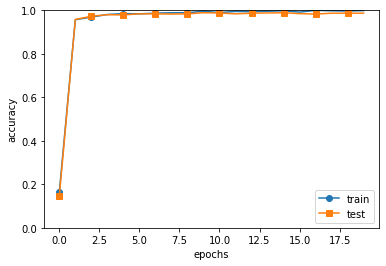

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.trainer import Trainer

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

max_epochs = 20

network = SimpleConvNet(input_dim=(1,28,28), 
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)
                        
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

# 매개변수 보존
network.save_params("params.pkl")
print("Saved Network Parameters!")

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

### CNN 시각화

### 1번째 층의 가중치 시각화

학습 전과 후의 가중치 비교

< 학습 전 >


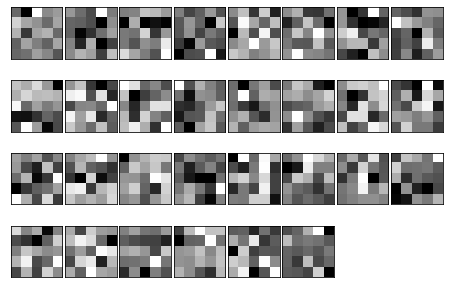

< 학습 후 >


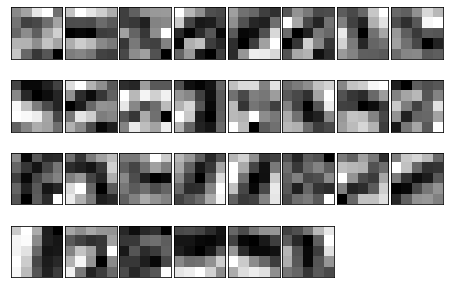

In [35]:
import numpy as np
import matplotlib.pyplot as plt

def filter_show(filters, nx=8, margin=3, scale=10):
    FN, C, FH, FW = filters.shape
    ny = int(np.ceil(FN / nx))

    fig = plt.figure()
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    for i in range(FN):
        ax = fig.add_subplot(ny, nx, i+1, xticks=[], yticks=[])
        ax.imshow(filters[i, 0], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()


network = SimpleConvNet()
# 무작위(랜덤) 초기화 후의 가중치
print('< 학습 전 >')
filter_show(network.params['W1'])

# 학습된 가중치
network.load_params("params.pkl")
print('< 학습 후 >')
filter_show(network.params['W1'])

- 학습 전 필터는 무작위로 초기화되어 흑백의 정도에 규칙성이 없음  
- 한편, 학습을 마친 필터는 규칙성이 있음  
    흰색에서 검은색으로 점차 변화하는 필터와 덩어리(블롭 blob)가 진 필터 등, 규칙을 띄는 필터로 바뀜  
    규칙성이 있는 필터는 에지(색상이 바뀐 경계선)나 블롭(국소적으로 덩어리진 영역) 등의 원시적인 정보를 추출할 수 있음

### 층 깊이에 따른 추출 정보 변화

합성곱 계층을 여러 겹 쌓으면,  
층이 깊어지면서 더 복잡하고 추상화된 정보가 추출됨  
  
처음 층은 단순한 에지에 반응하고, 이어서 텍스처에 반응하고, 더 복잡한 사물의 일부에 반응하도록 변화  
즉, 층이 깊어지면서 뉴런이 반응하는 대상이 단순한 모양에서 '고급'정보로 변화함

### 대표적인 CNN

### LeNet

<img src='./img/LeNet_1.png' width=500>

LeNet은 손글시 숫자를 인식하는 네트워크로, 1988년에 제안됨  
합성곱 계층과 풀링 계층(정확히는 단순히 '원소를 줄이기'만 하는 서브샘플링 계층)을 반복하고, 마지막으로 완전연결 계층을 거치면서 결과를 출력  
  
LeNet은 시그모이드 함수를 사용(현재는 주로 ReLU를 사용)  
LeNet은 서브샘플링을 하여 중간 데이터의 크기를 줄임(현재는 최대 풀링이 주류)

### AlexNet

<img src='./img/AlexNet_1.png' width=500>

AlexNet은 2012년에 발표  
합성곱 계층과 풀링 계층을 거듭하며 마지막으로 완전연결 계층을 거쳐 결과를 출력  
  
활성화 함수로 ReLU를 이용  
LRN(Local Response Normalization)이라는 국소적 정규화를 실시하는 계층을 이용  
드롭아웃 사용

참고 : https://compmath.korea.ac.kr/appmath2021/index.html